# Win Probability based on the objectives taken by professional League of Legends teams
## Mini Project MLME 2023
__Lukas Gade Ravnsborg - lravns20@student.aau.dk__

__Aalborg Universitet København, A. C. Meyers Vænge 15, 2450 København, Denmark.__

This report will outline my mini project for the class "Machine Learning for Media-Experiences" at Aalborg University Copenhagen for the Medialogy Masters class. In this mini project I will be looking at the professional scene of the MOBA game "League of Legends" and see what kind of models can be used to predict the outcome of a match.

In the game of "League of Legends" there are many factors that influence which team wins. In this project, I am gonna try and create a "Win Probability" prediction, in which I will be able to insert different variables into the model to see which team is more likely to win. The data set chosen is a large dataset consisting of every professional match as of the world final (November 19th) in the year 2023 and will include matches from both major and minor leagues. The data is taken from the site [Oracle Elixir](https://oracleselixir.com/tools/downloads).

## What I look at throughout the miniproject
In this mini project, I explore Classification, starting with Linear Regression and then comparing it to Linear SVC and k-NN. I use Classification in order to see how different early factors in a game of League of Legends have an effect on the winning team, and by those factors, classify the team as the winning or losing team.

## Pre-Processing
As the dataset I've chosen has a lot of data in it, much of which is unneeded for this project, a lot of preprocessing needs to be used.
### Libraries and versions used

In [116]:
import matplotlib.pyplot as plt # version = 3.8.2
import numpy as np              # version = 1.26.2
import pandas as pd             # version = 2.1.3
import seaborn as sns           # version = 0.13.0
#import sklearn                   version = 1.3.2

### First pre-processing step
The first step is clearing out a lot of data that is player specific, as well as clearing out all of the players, to only get the teams performances.

In [117]:
df = pd.read_csv("data/2023_LoL_esports_match_data_from_OraclesElixir.csv")

# Usually you would want to remove the data point if they are empty, however in this case I wanna do the opposite
# I remove all the values that have a player, as I am only interested in the teams performance, not the individual.
df = df[df['playername'].isna()]

# As there are a lot of data in this csv file, I am gonna trim most of them off here.
# Most are related to player specific stats, which we are not that interested in.
# Also some data points that are empty that get removed here
df.drop(columns=['playername', 'playerid', 'firstbloodkill','firstbloodassist','firstbloodvictim','dragons (type unknown)','total cs','monsterkillsownjungle','monsterkillsenemyjungle','teamkills','teamdeaths','damageshare'], inplace=True)
df.drop(columns=['gameid','datacompleteness','url','year','split','playoffs','date','game','patch','participantid','position','teamid','champion'],inplace=True)

df.replace("", float("NaN"), inplace=True) 
df.dropna(how='all',axis=1, inplace=True)

df.head()

C:\Users\Ejer\AppData\Local\Temp\ipykernel_3272\3706347904.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/2023_LoL_esports_match_data_from_OraclesElixir.csv")


,league,side,teamname,ban1,ban2,ban3,ban4,ban5,gamelength,result,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
10,LFL2,Blue,Klanik Esport,Sylas,Caitlyn,Wukong,Akali,Yone,2612,1,...,535.0,-530.0,-1671.0,-37.0,0.0,0.0,1.0,1.0,1.0,0.0
11,LFL2,Red,MS Company,Galio,Lucian,Fiora,Viktor,Azir,2612,0,...,498.0,530.0,1671.0,37.0,1.0,1.0,0.0,0.0,0.0,1.0
22,LFL2,Blue,beGenius ESC,Fiora,Kindred,Sejuani,Nautilus,Leona,2436,0,...,532.0,673.0,530.0,-34.0,4.0,6.0,3.0,3.0,4.0,4.0
23,LFL2,Red,ViV Esport,Heimerdinger,Wukong,Akali,Syndra,Sylas,2436,1,...,498.0,-673.0,-530.0,34.0,3.0,4.0,4.0,4.0,6.0,3.0
34,LFL2,Blue,Team du Sud,Zac,Sylas,Sejuani,Jarvan IV,Ornn,1980,1,...,452.0,-1901.0,-763.0,58.0,2.0,1.0,4.0,4.0,6.0,2.0


In [155]:
df_objectives = df.copy()

# outside of the game variables
df_objectives.drop(columns=['league','teamname','ban1','ban2','ban3','ban4','ban5'], inplace=True)

# individual performance or repeating factors
df_objectives.drop(columns=['team kpm','doublekills','triplekills','quadrakills','pentakills','firstblood','ckpm','opp_dragons','opp_elementaldrakes','opp_heralds','opp_elders','opp_barons','opp_towers','opp_turretplates','opp_inhibitors'],inplace=True)

# Factors that are accumulated at the end of the game, meaning they would cause a bias
df_objectives.drop(columns=['gamelength','kills','dragons','damagetochampions','totalgold','firstbaron'], inplace=True)

# Some of this data would need timeslot to be better used, meaning i cut it off
df_objectives.drop(columns=['deaths','assists','elders','heralds','barons','towers','firstmidtower','inhibitors','firsttothreetowers','elementaldrakes','infernals','clouds','mountains','hextechs','oceans','chemtechs'],inplace=True)

# some individual elements, some empty and some I deem less important
df_objectives.drop(columns=['dpm','damagetakenperminute','damagemitigatedperminute','earnedgold','earned gpm','earnedgoldshare','goldspent','gspd','minionkills','monsterkills','cspm','goldat10','xpat10','csat10','opp_goldat10','opp_xpat10','opp_csat10','csdiffat10','assistsat10','deathsat10','opp_killsat10','opp_assistsat10','opp_deathsat10','goldat15','xpat15','csat15','opp_goldat15','opp_xpat15','opp_csat15','csdiffat15','assistsat15','deathsat15','opp_killsat15','opp_assistsat15','opp_deathsat15'], inplace=True)

# Anything that relates to vision in the game, as it would need heatmapping to determine if the vision was good or not, which I do not have access to here.
df_objectives.drop(columns=['wardsplaced','wpm','wardskilled','wcpm','controlwardsbought','visionscore','vspm'], inplace=True)

# Turning the side column into a binary of 0/1, as it caused some problems with the code.
df_objectives['side'] = df_objectives['side'].map({'Blue': 0, 'Red': 1})

# As there are some games (mostly on the chinese servers) that do not have all of the data available, I just remove the rows and eliminate them from the dataset
df_objectives.dropna(inplace=True)
df_objectives.head()

,side,result,firstdragon,firstherald,firsttower,turretplates,golddiffat10,xpdiffat10,killsat10,golddiffat15,xpdiffat15,killsat15
10,0,1,0.0,1.0,1.0,4.0,75.0,-156.0,0.0,-530.0,-1671.0,0.0
11,1,0,1.0,0.0,0.0,2.0,-75.0,156.0,0.0,530.0,1671.0,1.0
22,0,0,0.0,1.0,0.0,6.0,-361.0,282.0,2.0,673.0,530.0,4.0
23,1,1,1.0,0.0,1.0,2.0,361.0,-282.0,2.0,-673.0,-530.0,3.0
34,0,1,0.0,0.0,0.0,3.0,-1001.0,-1748.0,1.0,-1901.0,-763.0,2.0


## Training and comparing the model

As mentioned earlier, I use a logistic regression model, in order to classify whether a game is a win or a loss. A logistic regression model is a nonbinary model that is _intended_ for multiclass classification, but can also be used for binary classification problems. It gives a probability score of how likely a value is to belonging to a certain class. At the end, I see how accurate the model is, and what the error of the model is. 

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report

X = df_objectives.drop('result', axis=1)    # Features (team stats)
y = df_objectives['result']                 # Target variable (winner)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=2000)   # as the data reaches an issue, due to the size of the dataset, I have to set the max iteration up to 2000
model.fit(X_train, y_train)                 # fit the model

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Accuracy:", accuracy)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Accuracy: 0.7536585365853659
Mean Squared Error: 0.24634146341463414
R-squared: 0.014407148950074444


### Evaluating the accuracy and error

The model gets the correct answer about 3/4th of the time, in which there are many variables that it is unlikely to take into account, as can be seen from the $R^2$ score. As this model is based on early variables of a League of Legends game, it makes sense it struggles to form a full picture of the entire game.

#### Confusion Matrix
A confusion matrix can be used to evaluate your model by performing test to see if the predicted values line up with reality, for a supervised learning algorithm. It visualizes it through a matrix, hence the name, where it maps it to the 4 spaces as allocated below, to showcase how well your model performs.

$\begin{bmatrix} True Positive & False Negative \\ False Positive & True Negative\end{bmatrix}$

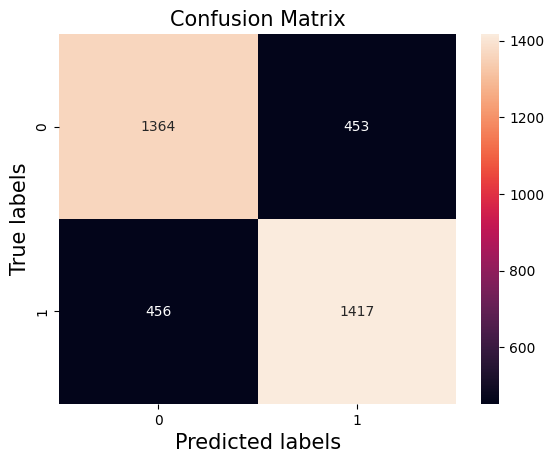

Prediction accuracy: 75.37%
[[0.3696477  0.12276423]
 [0.12357724 0.38401084]]


In [185]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
def generate_confusion_matrix(y_true, y_pred):
    # visualize the confusion matrix
    ax = plt.subplot()
    c_mat = confusion_matrix(y_true, y_pred)
    sns.heatmap(c_mat, annot=True, fmt='g', ax=ax)

    ax.set_xlabel('Predicted labels', fontsize=15)
    ax.set_ylabel('True labels', fontsize=15)
    ax.set_title('Confusion Matrix', fontsize=15)

# Generates the prediction values of the confusion matrix and measures them up against the test values.
y_pred = model.predict(X_test)
generate_confusion_matrix(y_test, y_pred)
plt.show()

# compute the accuracy
multi_accuracy = accuracy_score(y_test, y_pred)
print(f"Prediction accuracy: {100*multi_accuracy:.2f}%")

# Getting the normalized values of the confusion matrix
print(confusion_matrix(y_test, y_pred,normalize='all'))


In this case, the model is able to correctly predict 75%, where it is evenly spread between true positive/negatives. 

#### ROC Curve
An ROC curve does nearly the same as a confusion matrix, in that it is a representation of the postive instances predicted by the model (TPR) vs. the negative instances correctly predicted by the model (FPR).

$TPR = \frac{True Positives}{True Positives + False Negatives}$

$FPR = \frac{False Positives}{False Positives + True Negatives}$

0.8361544186850124


<Axes: >

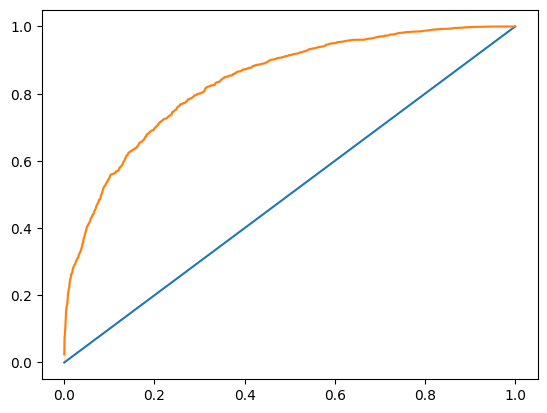

In [160]:
#Gets the scores needed for the ROC curve
y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

#Printing the score, good for determining how great of an ROC curve it is
print(roc_auc_score(y_test, y_scores[:,1]))
#Plots the ROC curve
sns.lineplot(x=[0, 1], y=[0, 1])
sns.lineplot(x=fpr, y=tpr)

In this model, it strays far from the central line, meaning it is great at discriminating between true positive and false positive.

### Testing the model with a game from the World Championship

I wanted to test out my model by taking one of the most popular games from the world championship (T1 vs JDG Semifinal Game 3) where T1 was the victorious team.

In [207]:
# Data of the T1 side of the game
T1_game = pd.DataFrame({
    'side': [0],
    'firstdragon': [1],
    'firstherald': [1],
    'firsttower': [0],
    'turretplates': [2],
    'golddiffat10': [-401],
    'xpdiffat10': [-21],
    'killsat10': [3],
    'golddiffat15': [-2308],
    'xpdiffat15': [-1856],
    'killsat15': [3],
})

# Data of the JDG side of the game
JDG_game = pd.DataFrame({
    'side': [1],
    'firstdragon': [0],
    'firstherald': [0],
    'firsttower': [1],
    'turretplates': [8],
    'golddiffat10': [401],
    'xpdiffat10': [21],
    'killsat10': [4],
    'golddiffat15': [2308],
    'xpdiffat15': [1856],
    'killsat15': [5],
})

# Makes a probability prediction on T1's chances
y_pred = model.predict_proba(T1_game)
print("T1 winning this game, based on early predictions:", y_pred)
# Makes a probability prediction on JDG's chances
y_pred = model.predict_proba(JDG_game)
print("JDG winning this game, based on early predictions:", y_pred)

T1 winning this game, based on early predictions: [[0.73216873 0.26783127]]
JDG winning this game, based on early predictions: [[0.27478586 0.72521414]]


According to the model, JDG has a higher likelyhood (75%) of being the winning team based on their early lead in comparison to T1.

### Comparing the classification model

Finally I wish to compare the model used to two other models: Linear-SVC, a suitable model for large datasets with a clear linear separation (win/loss in this case), and k-Nearest Neighbors (k-NN), a model suitable for complex boundaries.

In [217]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

C = 6
# k-Nearest Neighbor classifier with a leaf size of 30
classifiers = {
    'Linear SVC': SVC(kernel='linear', C=C, max_iter=2000, probability=True,random_state=0),
    'KNN classifier': KNeighborsClassifier(n_neighbors=C, leaf_size=30, p=1), 
}

import warnings
# Filter out user warnings due to KNN usesr warnings
warnings.filterwarnings("ignore", category=UserWarning)

#Loops through an evaluates the Linear SVC and the kNN classifier, by fitting them according to the training data
#and then runs them through the classifier to get how accurate it is, and the models classification report
for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, np.ravel(y_train))
    X_test = np.ascontiguousarray(X_test) # fixes KNN c_contiguous array error
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))

# Classification report of the logistic regression model
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

Accuracy (train) for Linear SVC: 72.5% 
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1817
           1       0.77      0.65      0.71      1873

    accuracy                           0.73      3690
   macro avg       0.73      0.73      0.72      3690
weighted avg       0.73      0.73      0.72      3690

Accuracy (train) for KNN classifier: 72.3% 
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1817
           1       0.76      0.66      0.71      1873

    accuracy                           0.72      3690
   macro avg       0.73      0.72      0.72      3690
weighted avg       0.73      0.72      0.72      3690

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1817
           1       0.76      0.76      0.76      1873

    accuracy                           0.75      3690
   macro avg       0.75      0.75      0.75 

Between the 3 models, their accuracy for the data is about the same, in that they are able to predict the outcome of the game with an accuracy of 70-75%.

## Discussion
Throughout this project I have actually purposefully made by accuracy worse and worse. It started from having an accuracy of 97%, lowering to 84% and then finally 75%. This has been due to the choices in which variables from the dataset I've been wanting to include in the regression. I started out by having a lot of variables from the end of the game, which would "improve" the model. But if you know the outcome, of course you are gonna be correct. I tuned it to be more focused towards early measures (first tower/herald and turret plates) as they are often taken in the first 15 minutes, where the games have a low chances of ending.

## Conclusion
In this project I have created a model that is able to predict the outcome of a match of League of Legends with an accuracy of 75% based on early states of the game. However, there are many variables that the model is unlikely to take into account, and would disrupt its accuracy. While the model is far from perfect, it can still be used as a standpoint to get prediction on the state of the game, to help analysts or viewers get a better grasp of who is winning the game, with so many hidden factors at play.